In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('gld_price_data.csv')

In [4]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
X=data.drop(columns=['Date','GLD'],axis=1)

In [7]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [8]:
Y=data['GLD']

<AxesSubplot: >

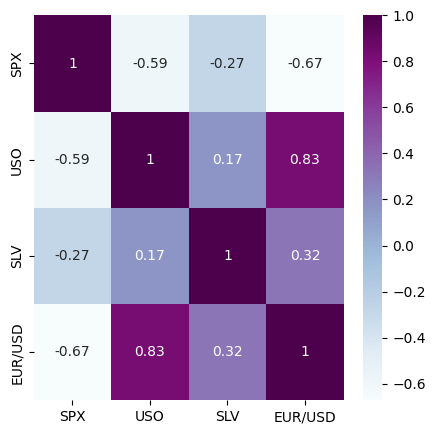

In [15]:
matrix = X.corr()
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(matrix,cmap="BuPu", annot = True)

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [18]:
from sklearn.ensemble import RandomForestRegressor
rs=RandomForestRegressor(n_estimators=10)

In [19]:
rs.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [20]:
predict=rs.predict(x_test)

In [21]:
from sklearn.metrics import r2_score

In [22]:
# R squared error
error_score = r2_score(y_test, predict)
print("R squared error : ", error_score)

R squared error :  0.986085624506156


In [23]:
y_test=list(y_test)

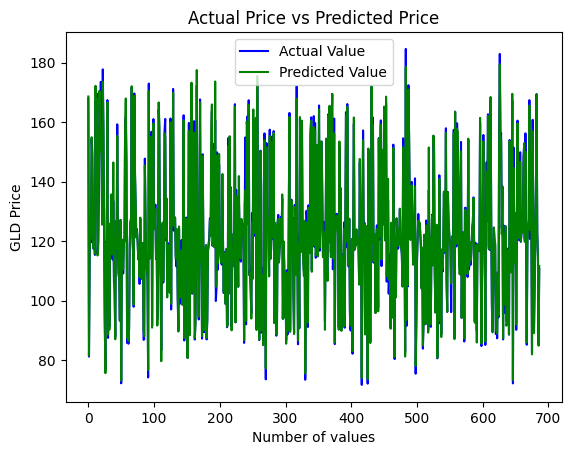

In [24]:
#graph plot for actual vs predicted data 
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(predict, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [25]:
#the r2 score and this actual vs predicted graph give satisfactory response